## Data Cleaning USA:
#### In this Jupyter Notebook you will find the process of data cleaning of a car insurance company from the USA.
###### The process of Data Cleaning will be split in 2 depending on the type of data that I will be working on. Therefore, it contains 2 steps: Numerical data & Categorical data.

First, we will import the libraries that we will be using.

In [353]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [354]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Then, we will import the dataset that we will be working on.

In [355]:
car = pd.read_csv('../Data/AutoInsurance.csv')

We explore the dataset.

In [356]:
car.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [357]:
car.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Columns and explanation of columns:
- Customer: customer id
- State: State
- Customer Lifetime Value: total amount of money paid by client.
- Response: No information included
- Coverage: Type of insurance
- Education: Education level of the customer.
- Effective to Date: Date since when the insurance is active (They are usually activated in a yearly basis,if impayment it is not active)
- EmploymentStatus: Status of employment.
- Gender: Gender
- Income: Yearly income.
- Location Code:
- Marital Status: Married or not.
- Monthly Premium Auto: Amount paid in a monthly basis.
- Months since Last Claim: Months since last accident.
- Months Since Policy Inception: Months since activation of the insurance.
- Number of Open Complaints: Number of accidents still open.
- Number of Policies: Number of insurances hold by the same person
- Policy Type: Personal / Corporate
- Renew Offer Type: Next offer
- Sales Channel: Channel of sales of insurance.
- Total Claim Amount: Amount claimed by other insurances in car accident.
- Vehicle Class: Type of car.
- Vehicle Size: Size


In order to work better with data I will change some column names.

In [358]:
car.rename(columns = {'Customer Lifetime Value':'LTV', 'Effective To Date':'Expiration_date',\
                      'EmploymentStatus': 'Job_Status','Location Code':'Location',\
                      'Marital Status':'Civil_Status', 'Monthly Premium Auto':'Monthly_Price' ,\
                      'Months Since Last Claim': 'Months_LastClaim',\
                      'Months Since Policy Inception': 'Months_SinceActivation',\
                      'Number of Open Complaints':'Number_Open_Complaints',
                      'Number of Policies':'Number_Insurances',\
                      'Renew Offer Type':'Offer_Type_Renew', 'Sales Channel': 'Sales_Channel', \
                      'Total Claim Amount':'Total_Claim_Amount',\
                      'Vehicle Class':'Car_Type', 'Vehicle Size':'Car_Size', \
                      'Policy Type': 'Policy_Type'}, inplace = True)

In [359]:
car.columns

Index(['Customer', 'State', 'LTV', 'Response', 'Coverage', 'Education',
       'Expiration_date', 'Job_Status', 'Gender', 'Income', 'Location',
       'Civil_Status', 'Monthly_Price', 'Months_LastClaim',
       'Months_SinceActivation', 'Number_Open_Complaints', 'Number_Insurances',
       'Policy_Type', 'Policy', 'Offer_Type_Renew', 'Sales_Channel',
       'Total_Claim_Amount', 'Car_Type', 'Car_Size'],
      dtype='object')

I decide to drop some columns since I will not be using them in this project.

In [360]:
car.drop(columns = ['Response', 'Policy', 'Offer_Type_Renew','LTV','Expiration_date', 'Total_Claim_Amount'], inplace = True)

Now I'm going to check the type of the data we have and empty values.

In [361]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
Customer                  9134 non-null object
State                     9134 non-null object
Coverage                  9134 non-null object
Education                 9134 non-null object
Job_Status                9134 non-null object
Gender                    9134 non-null object
Income                    9134 non-null int64
Location                  9134 non-null object
Civil_Status              9134 non-null object
Monthly_Price             9134 non-null int64
Months_LastClaim          9134 non-null int64
Months_SinceActivation    9134 non-null int64
Number_Open_Complaints    9134 non-null int64
Number_Insurances         9134 non-null int64
Policy_Type               9134 non-null object
Sales_Channel             9134 non-null object
Car_Type                  9134 non-null object
Car_Size                  9134 non-null object
dtypes: int64(6), object(12)
memory usage: 1.3+ MB


No null values found and the data types are correct.


### Numerical data
###### Let's start by cleaning numerical data.


Let's check the describe function in order to see if there are anomalies in our data.

In [362]:
car.describe()

,Income,Monthly_Price,Months_LastClaim,Months_SinceActivation,Number_Open_Complaints,Number_Insurances
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


We can see some strange numbers in Income, Number_Insurances and Number_Open_Complaints. Let's check in a boxplot, if there are outliers

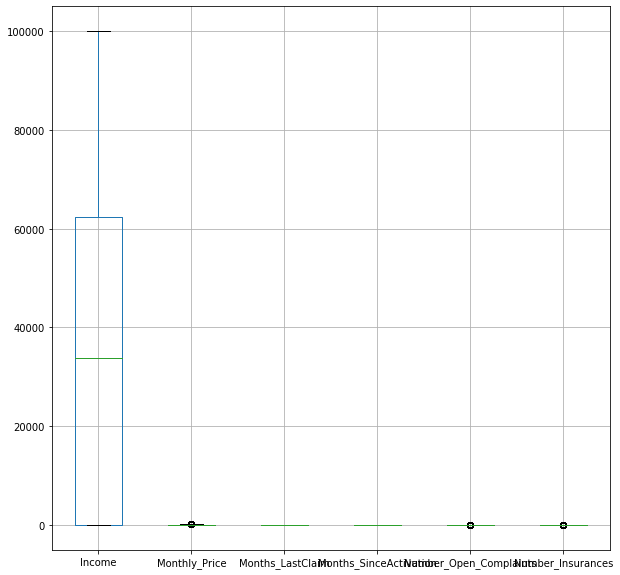

In [363]:
car.boxplot() #By looking at the boxplots, we can see that there might be some outliers.

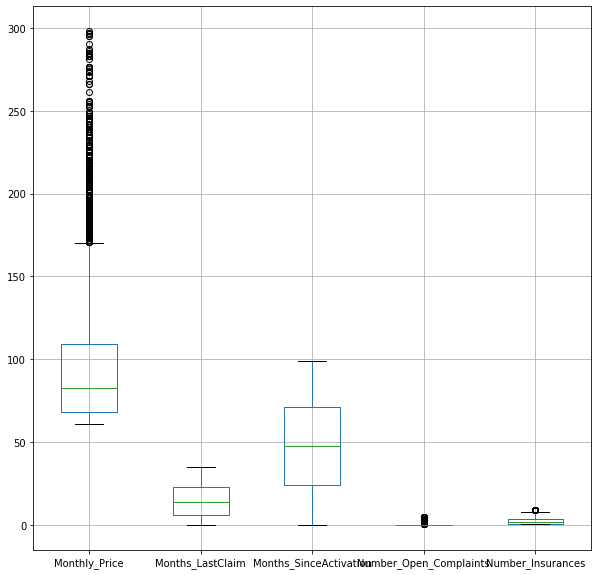

In [364]:
car.boxplot(['Monthly_Price', 'Months_LastClaim', 'Months_SinceActivation', 'Number_Open_Complaints', 'Number_Insurances'])

###### Let's start looking at Income.
It seems that there might not be outliers, let's check it individually.

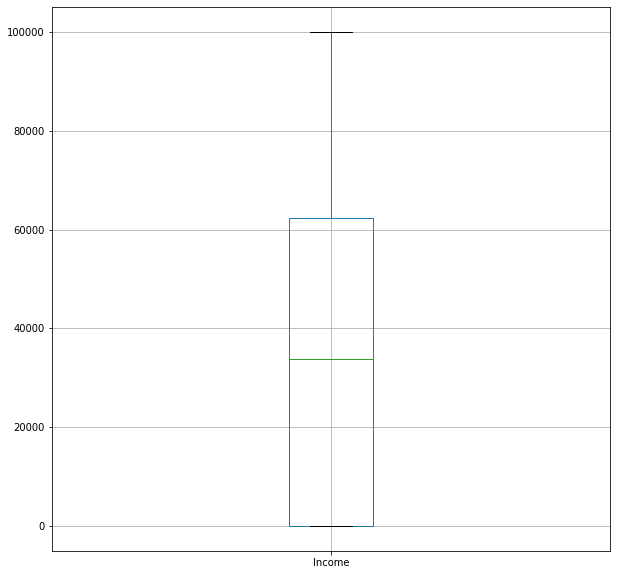

In [365]:
car.boxplot(column = 'Income') #As expected, no outliers

Even though there are no shown outliers in the Income column, there are some values at 0, which correspond to Unemployed customers (25%), as seen below.

In [366]:
car.groupby('Job_Status').min()['Income'] 

Job_Status
Disabled         10097
Employed         20009
Medical Leave    10037
Retired          10180
Unemployed           0
Name: Income, dtype: int64

In [367]:
#Checking the proportion of Unemployed. 
len(car.query('Income==0'))/len(car)

0.25366761550251804

###### Inside Monthly Price

Looking at the boxplot graph above, we can see that there are outliers. In order to check if they are outliers or not, we will apply the 3 times the Interquartile Range. So, if a value is far from 3 times the Interquartile Ranfe, it will be an outlier.

In [368]:
q1,q3= np.quantile(car['Monthly_Price'],[0.25,0.75]) #q1 and q3 are the quantiles of column LTV

In [369]:
iqr = q3-q1 #interquartile range of ltv
lower = q1 - iqr*3 #Lower limit
upper = q3 + iqr*3 #Upper limit

Let's check the proportion of outliers:

In [370]:
len(car.query(f'Monthly_Price < {lower} | Monthly_Price > {upper}'))/len(car)

0.009415371140792644

0.9% of outliers with respect to the original dataframe so, we could delete them.

In [371]:
car.query(f'Monthly_Price < {lower} | Monthly_Price > {upper}') #Checking outliers

,Customer,State,Coverage,Education,Job_Status,Gender,Income,Location,Civil_Status,Monthly_Price,Months_LastClaim,Months_SinceActivation,Number_Open_Complaints,Number_Insurances,Policy_Type,Sales_Channel,Car_Type,Car_Size
31,UL64533,Nevada,Extended,High School or Below,Employed,M,65999,Urban,Married,237,1,14,0,6,Corporate Auto,Agent,Luxury SUV,Medsize
196,AZ62651,Oregon,Premium,High School or Below,Employed,M,56855,Suburban,Single,255,12,1,0,1,Corporate Auto,Web,Luxury SUV,Medsize
248,FO35655,Oregon,Extended,Bachelor,Unemployed,M,0,Suburban,Single,245,34,83,0,1,Corporate Auto,Branch,Luxury SUV,Medsize
404,DJ91267,Nevada,Extended,Bachelor,Employed,F,34226,Rural,Married,244,29,22,0,2,Personal Auto,Agent,Luxury SUV,Small
496,JC11405,Oregon,Premium,High School or Below,Employed,M,55687,Suburban,Divorced,276,33,91,0,1,Personal Auto,Agent,Luxury SUV,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8662,FS38926,California,Extended,Bachelor,Employed,F,66022,Rural,Married,239,17,80,0,1,Personal Auto,Web,Luxury Car,Medsize
8853,JY66887,California,Extended,High School or Below,Unemployed,F,0,Suburban,Single,247,5,12,3,5,Personal Auto,Branch,Luxury Car,Medsize
8911,QK82654,California,Premium,College,Unemployed,M,0,Suburban,Single,286,3,3,0,9,Personal Auto,Agent,Luxury SUV,Small
8943,FM12425,California,Extended,College,Employed,M,26488,Suburban,Divorced,247,21,39,0,7,Personal Auto,Web,Luxury SUV,Medsize


After checking the outliers, we can see that the other information is ok, so I will check the distribution in histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120a77940>]],
      dtype=object)

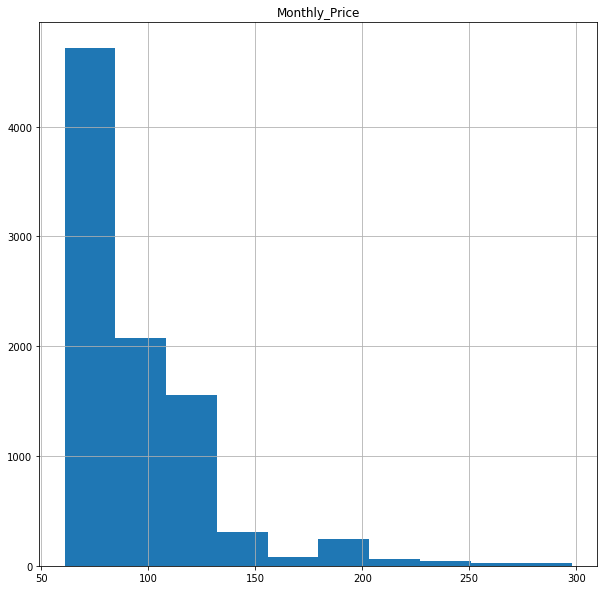

In [372]:
car.hist('Monthly_Price')

By the graph above we can see that the distribution is skewed to the left and it makes sense that low amount of people pay higher prices. Therefore, I have decided not to delete them in order to keep the information in the other columns.

###### Inside Months_LastClaim &  Inside Months_SinceActivation

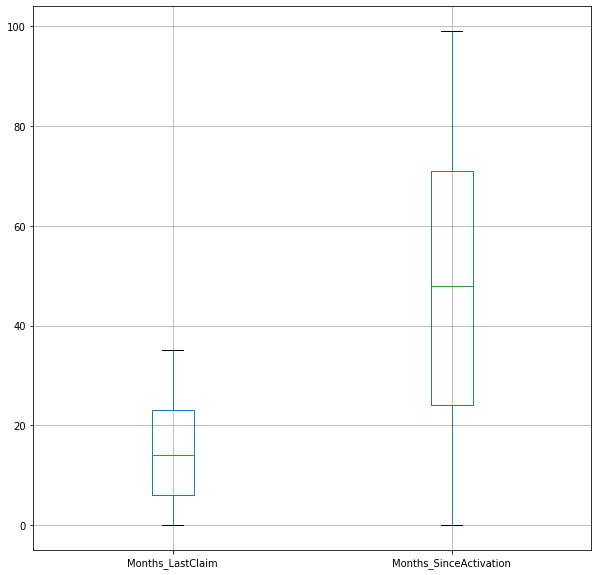

In [373]:
car.boxplot(['Months_LastClaim', 'Months_SinceActivation']) 
#I am examining here if in a more zoomed look there are ouliers

It seems that these column does not have outliers. In addition, I have not observed anything strange on the describe.

###### Inside Number_Open_Complaints

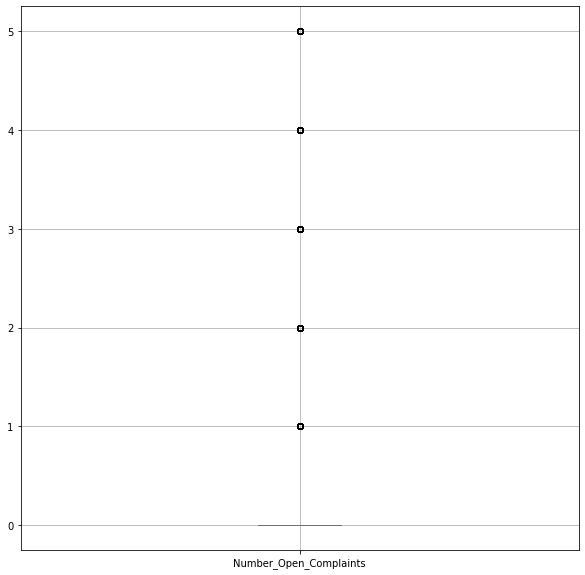

In [374]:
car.boxplot('Number_Open_Complaints')
#It seems that there are some outliers

After having a look at the boxplot, we can see that there are some outliers that correspond to people having 1 or more open claim. Hence, I am not considering them outliers since, they are people that complement my analysis, if I get rid of those, my analysis will not make sense.

###### Inside Number_Insurances

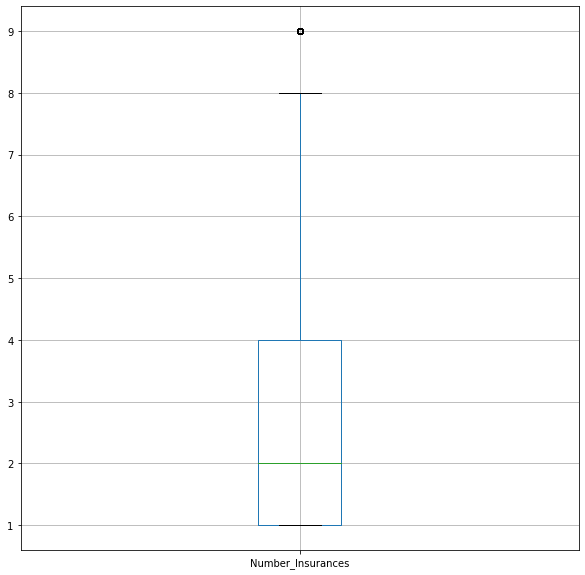

In [375]:
car.boxplot('Number_Insurances')

In [376]:
car.query('Number_Insurances > 8') #Taking a look at the rows with >8 insurances issued.

,Customer,State,Coverage,Education,Job_Status,Gender,Income,Location,Civil_Status,Monthly_Price,Months_LastClaim,Months_SinceActivation,Number_Open_Complaints,Number_Insurances,Policy_Type,Sales_Channel,Car_Type,Car_Size
6,XZ87318,Oregon,Basic,College,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Agent,Four-Door Car,Medsize
74,BN87372,Oregon,Basic,Bachelor,Employed,M,75644,Suburban,Divorced,65,5,68,3,9,Personal Auto,Branch,Two-Door Car,Medsize
94,ON44465,California,Extended,High School or Below,Unemployed,F,0,Suburban,Single,77,8,10,1,9,Personal Auto,Agent,Four-Door Car,Medsize
96,KH48895,Arizona,Basic,Master,Medical Leave,F,17780,Rural,Married,109,12,18,0,9,Personal Auto,Branch,SUV,Medsize
98,RI22468,Arizona,Basic,Bachelor,Employed,F,57740,Urban,Married,74,30,87,3,9,Personal Auto,Web,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8991,BD12981,California,Basic,College,Employed,F,39337,Urban,Single,74,29,1,1,9,Personal Auto,Agent,Four-Door Car,Medsize
9006,VC11777,California,Basic,High School or Below,Employed,F,80521,Suburban,Single,65,20,43,2,9,Personal Auto,Branch,Four-Door Car,Small
9011,NC80854,California,Basic,College,Unemployed,F,0,Suburban,Single,71,22,57,0,9,Personal Auto,Agent,Four-Door Car,Medsize
9017,WG29557,California,Basic,Master,Employed,M,74919,Urban,Married,63,10,31,0,9,Personal Auto,Branch,Four-Door Car,Medsize


It does not seem a typo and there are 416 rows of people who are having > 8 insurances.

In [377]:
print('Number of rows:',len(car.query('Number_Insurances > 8')))
print('Proportion of > 9 insurances:',len(car.query('Number_Insurances > 8'))*100/len(car))
#Proportion with respect to original dataframe.

Number of rows: 416
Proportion of > 9 insurances: 4.554412086708999


After looking at the number of rows, I will not get rid of 400 rows, because I would be getting rid of many information that could add more information to the other columns where the information is correct.

###### Outliers combined

I am also checking if there is a combined outlier, as row acting as an outlier in different columns. In order to do that I am checking if there are rows with values outside the distribution. 


Hence in order to be an outlier:
- Number_Insurances has to be greater than 8
- Number_Open_Complaints has to be greater than 0
- Monthly_Price has to be greater > 232 (upper (+3IQR), calculated in the Monthly Price)

In [378]:
#Check if some coincidences between columns with outliers.
car.query(f'Number_Insurances > 8 & Number_Open_Complaints > 0 & Monthly_Price > {upper}')

,Customer,State,Coverage,Education,Job_Status,Gender,Income,Location,Civil_Status,Monthly_Price,Months_LastClaim,Months_SinceActivation,Number_Open_Complaints,Number_Insurances,Policy_Type,Sales_Channel,Car_Type,Car_Size


There are no combined outliers.

We have finished cleaning data for numerical part.

### Categorical data
###### Cleaning categorical data.

Let's check if there are mispellings or strange names.

In [379]:
car['State'].value_counts() #State column does not present anomalies.

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [380]:
car['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [381]:
car['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [382]:
car['Job_Status'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: Job_Status, dtype: int64

In [383]:
car['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [384]:
car['Location'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location, dtype: int64

In [385]:
car['Civil_Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Civil_Status, dtype: int64

In [389]:
car['Policy_Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy_Type, dtype: int64

In [391]:
car['Sales_Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales_Channel, dtype: int64

There are no typos and anormalities in the categorical variables.

In [393]:
car.to_csv('../Data/Clean_Insurance_USA.csv')

In the cell above I have saved the cleaned file in Data folder.